In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  Tạo dữ liệu sin 
def create_sine_data(n_points=1500, seq_len=10):
    x = np.linspace(0, 60, n_points)  
    y = np.sin(x)
    
    X, Y = [], []
    for i in range(len(y) - seq_len):
        X.append(y[i:i+seq_len])
        Y.append(y[i+seq_len])
    
    X = np.array(X)[:, :, np.newaxis]        
    Y = np.array(Y)[:, np.newaxis]
    
    split = -300
    return (torch.FloatTensor(X[:split]), torch.FloatTensor(Y[:split]),
            torch.FloatTensor(X[split:]),  torch.FloatTensor(Y[split:]))

X_train, y_train, X_test, y_test = create_sine_data()

In [3]:
#  Model LSTM 
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers,
                           batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: (batch, seq_len, input_size)
        out, (hn, cn) = self.lstm(x)
        # lấy hidden state cuối cùng của layer cuối
        out = self.fc(out[:, -1, :])          # hoặc hn[-1] nếu num_layers=1
        return out

In [4]:
#  Huấn luyện 
model = SimpleLSTM(hidden_size=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:4d}/{epochs}, Loss: {loss.item():.6f}")

Epoch  100/500, Loss: 0.000926
Epoch  200/500, Loss: 0.000109
Epoch  300/500, Loss: 0.000027
Epoch  400/500, Loss: 0.000006
Epoch  500/500, Loss: 0.000003


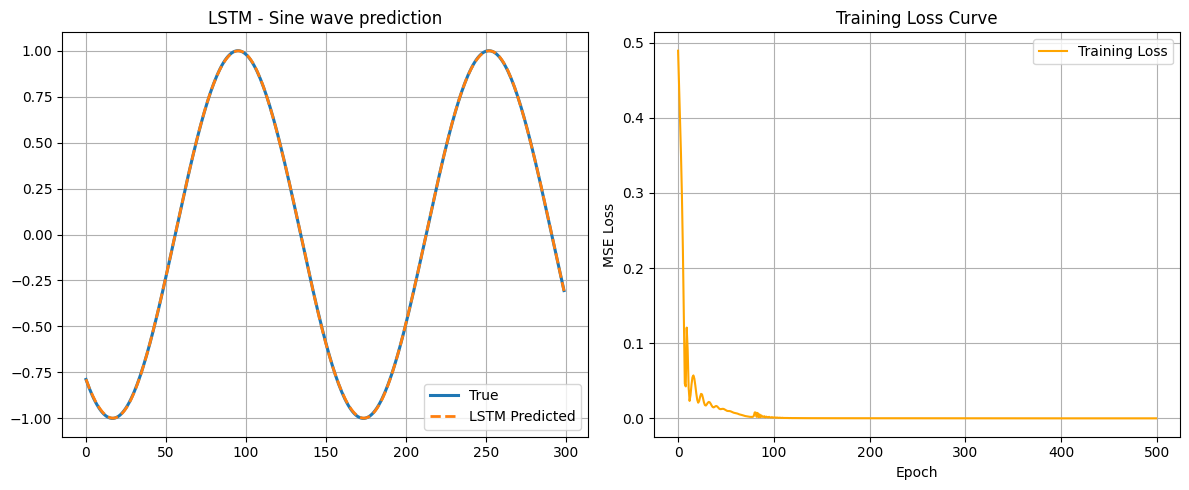

In [5]:
#  Dự đoán và vẽ 
model.eval()
with torch.no_grad():
    pred_test = model(X_test).numpy()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(y_test.numpy(), label='True', linewidth=2.2)
plt.plot(pred_test, label='LSTM Predicted', linestyle='--', linewidth=2)
plt.title("LSTM - Sine wave prediction")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses, label='Training Loss', color='orange')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()